### Importación de datos



In [209]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
!pip install matplotlib

#1. Análisis de facturación



In [ ]:
suma_total=tienda['Precio'].sum()
suma_total2=tienda2['Precio'].sum()
suma_total3=tienda3['Precio'].sum()
suma_total4=tienda4['Precio'].sum()

print(f'La suma total de la tienda 1 es: {suma_total}')
print(f'La suma total de la tienda 2 es: {suma_total2}')
print(f'La suma total de la tienda 3 es: {suma_total3}')
print(f'La suma total de la tienda 4 es: {suma_total4}')
#

Gráfico

In [ ]:
import matplotlib.pyplot as plt

suma=[suma_total,suma_total2,suma_total3,suma_total4]
lista=['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

plt.title('Ingresos por tienda')
plt.ylabel('Ingreso')
plt.xlabel('Tiendas')
plt.bar(lista, suma)
plt.show()

# 2. Ventas por categoría

In [ ]:
def analizar_ventas_por_categoria(df):
    ventas_por_categoria = df.groupby('Categoría del Producto')['Producto'].count().reset_index()
    ventas_por_categoria.rename(columns={'Producto': 'Cantidad de Ventas'}, inplace=True)
    return ventas_por_categoria

ventas_tienda1 = analizar_ventas_por_categoria(tienda)
ventas_tienda2 = analizar_ventas_por_categoria(tienda2)
ventas_tienda3 = analizar_ventas_por_categoria(tienda3)
ventas_tienda4 = analizar_ventas_por_categoria(tienda4)

resultados_combinados = pd.concat([ventas_tienda1, ventas_tienda2, ventas_tienda3, ventas_tienda4], ignore_index=True)

ventas_totales_por_categoria = resultados_combinados.groupby('Categoría del Producto')['Cantidad de Ventas'].sum().reset_index()
ventas_totales_por_categoria.rename(columns={'Cantidad de Ventas': 'Cantidad de Ventas Totales'}, inplace=True)

print("Cantidad de ventas totales por categoría en todas las tiendas:")
print(ventas_totales_por_categoria)

Gráfico

In [ ]:
import matplotlib.pyplot as plt
plt.pie(ventas_totales_por_categoria['Cantidad de Ventas Totales'], labels=ventas_totales_por_categoria['Categoría del Producto'], autopct='%1.1f%%')
plt.title('Ventas por categoría')
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio=tienda['Calificación'].mean().round(2)
calificacion_promedio2=tienda2['Calificación'].mean().round(2)
calificacion_promedio3=tienda3['Calificación'].mean().round(2)
calificacion_promedio4=tienda4['Calificación'].mean().round(2)

calificaciones_promedio=[calificacion_promedio,calificacion_promedio2,calificacion_promedio3,calificacion_promedio4]
lista=['tienda','tienda2','tienda3','tienda4']

calificacion_promedio_tienda=zip(lista,calificaciones_promedio)

for tienda, calificacion in calificacion_promedio_tienda:
    print(f'La calificación promedio de la {tienda} es: {calificacion}')



Gráfico

In [ ]:
import matplotlib.pyplot as plt

def absolute_value(val):
    a = float(round(val/100.*sum(calificaciones_promedio),2))
    return a

plt.pie(calificaciones_promedio, labels=lista,autopct=absolute_value)
plt.title('Ventas por categoría')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
productos_max_tienda=tienda['Producto'].value_counts().head(5)
productos_max_tienda2=tienda2['Producto'].value_counts().head(5)
productos_max_tienda3=tienda3['Producto'].value_counts().head(5)
productos_max_tienda4=tienda4['Producto'].value_counts().head(5)

productos_min_tienda=tienda['Producto'].value_counts(ascending=True).head(5)
productos_min_tienda2=tienda2['Producto'].value_counts(ascending=True).head(5)
productos_min_tienda3=tienda3['Producto'].value_counts(ascending=True).head(5)
productos_min_tienda4=tienda4['Producto'].value_counts(ascending=True).head(5)

print('Los productos más vendidos en la tienda 1 son:')
print(productos_max_tienda)
print('')
print('Los productos menos vendidos en la tienda 1 son:')
print(productos_min_tienda)
print('')
print('')
print('Los productos más vendidos en la tienda 2 son:')
print(productos_max_tienda2)
print('')
print('Los productos menos vendidos en la tienda 2 son:')
print(productos_min_tienda2)
print('')
print('')
print('Los productos más vendidos en la tienda 3 son:')
print(productos_max_tienda3)
print('')
print('Los productos menos vendidos en la tienda 3 son:')
print(productos_min_tienda3)
print('')
print('')

print('Los productos más vendidos en la tienda 4 son:')
print(productos_max_tienda4)
print('')

print('Los productos menos vendidos en la tienda 4 son:')
print(productos_min_tienda4)









Gráfico

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
productos_max_tienda.plot(kind='barh', color='skyblue')
plt.title('Top 5 Productos Más Vendidos - Tienda 1')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.subplot(1, 2, 2)
productos_min_tienda.plot(kind='barh', color='salmon')
plt.title('Top 5 Productos Menos Vendidos - Tienda 1')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.tight_layout()
plt.show()

# Gráficos para la Tienda 2
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
productos_max_tienda2.plot(kind='barh', color='lightgreen')
plt.title('Top 5 Productos Más Vendidos - Tienda 2')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.subplot(1, 2, 2)
productos_min_tienda2.plot(kind='barh', color='lightcoral')
plt.title('Top 5 Productos Menos Vendidos - Tienda 2')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.tight_layout()
plt.show()

# Gráficos para la Tienda 3
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
productos_max_tienda3.plot(kind='barh', color='lightsteelblue')
plt.title('Top 5 Productos Más Vendidos - Tienda 3')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.subplot(1, 2, 2)
productos_min_tienda3.plot(kind='barh', color='navajowhite')
plt.title('Top 5 Productos Menos Vendidos - Tienda 3')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.tight_layout()
plt.show()

# Gráficos para la Tienda 4
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
productos_max_tienda4.plot(kind='barh', color='gold')
plt.title('Top 5 Productos Más Vendidos - Tienda 4')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.subplot(1, 2, 2)
productos_min_tienda4.plot(kind='barh', color='mediumorchid')
plt.title('Top 5 Productos Menos Vendidos - Tienda 4')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
costo_de_envio_promedio=tienda['Costo de envío'].mean().round(2)
costo_de_envio_promedio_tienda2=tienda2['Costo de envío'].mean().round(2)
costo_de_envio_promedio_tienda3=tienda3['Costo de envío'].mean().round(2)
costo_de_envio_promedio_tienda4=tienda4['Costo de envío'].mean().round(2)

costos_de_envio_promedio=[costo_de_envio_promedio,costo_de_envio_promedio_tienda2,costo_de_envio_promedio_tienda3,costo_de_envio_promedio_tienda4]
lista=['tienda','tienda2','tienda3','tienda4']

costos_de_envio_promedio_tienda=zip(lista,costos_de_envio_promedio)

for tienda, costo in costos_de_envio_promedio_tienda:
    print(f'El costo promedio de envío de la {tienda} es: {costo}')

Gráfico

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(lista, costos_de_envio_promedio)
ax.set_xlabel('Tiendas')
ax.set_ylabel('Costo de envío')
ax.set_title('Costo de envío por tienda')
plt.show()

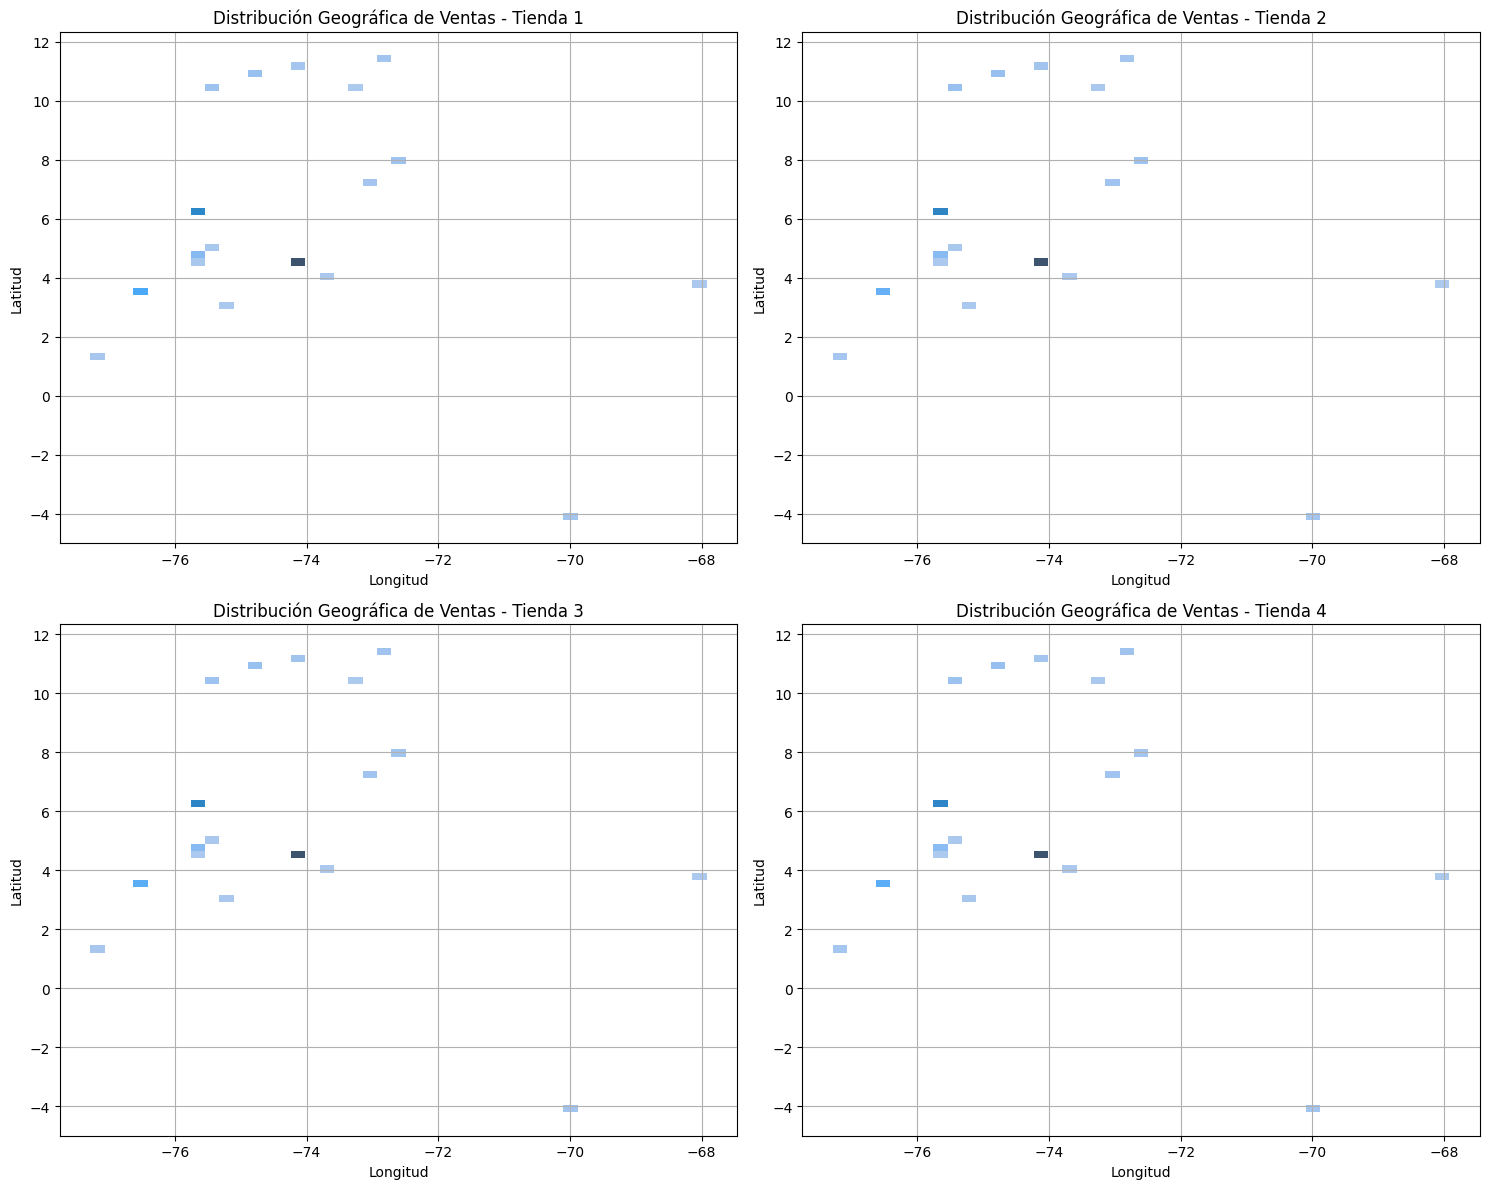

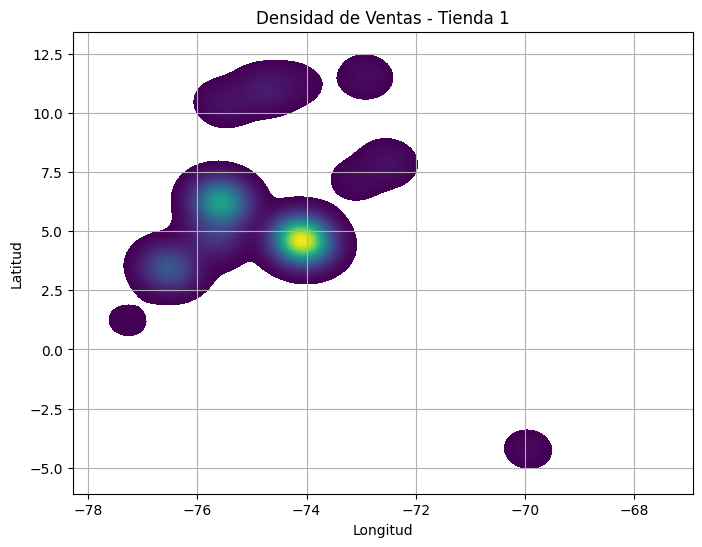

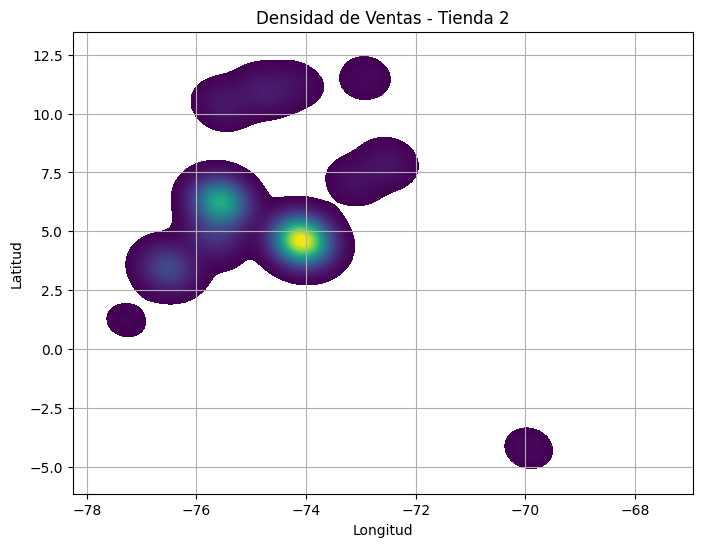

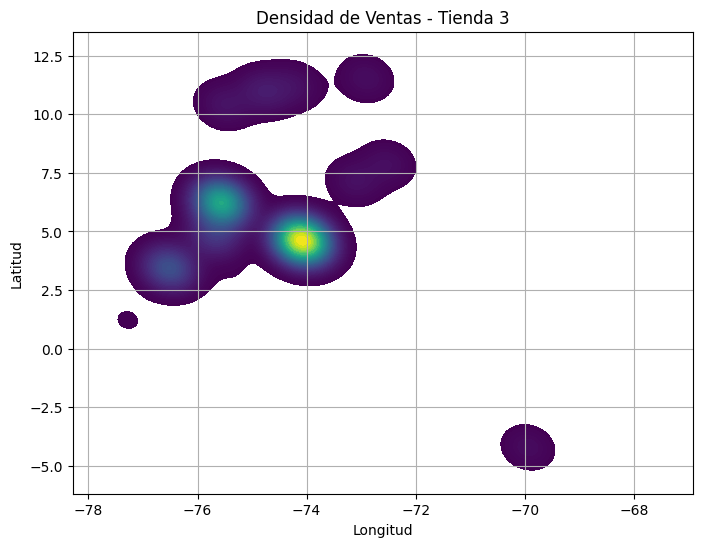

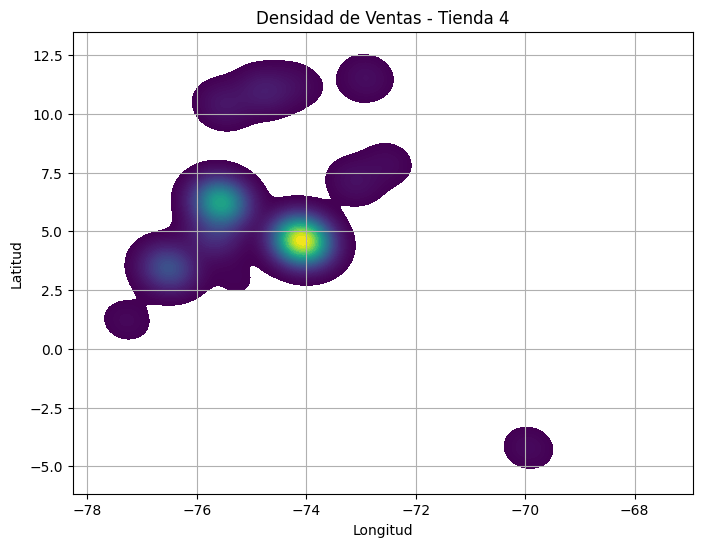

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Convertir las columnas de latitud y longitud a numérico (asegurándose de manejar errores)
tienda['lat'] = pd.to_numeric(tienda['lat'], errors='coerce')
tienda['lon'] = pd.to_numeric(tienda['lon'], errors='coerce')
tienda2['lat'] = pd.to_numeric(tienda2['lat'], errors='coerce')
tienda2['lon'] = pd.to_numeric(tienda2['lon'], errors='coerce')
tienda3['lat'] = pd.to_numeric(tienda3['lat'], errors='coerce')
tienda3['lon'] = pd.to_numeric(tienda3['lon'], errors='coerce')
tienda4['lat'] = pd.to_numeric(tienda4['lat'], errors='coerce')
tienda4['lon'] = pd.to_numeric(tienda4['lon'], errors='coerce')

# Eliminar filas con valores NaN en latitud o longitud para cada tienda
tienda_cleaned = tienda.dropna(subset=['lat', 'lon'])
tienda2_cleaned = tienda2.dropna(subset=['lat', 'lon'])
tienda3_cleaned = tienda3.dropna(subset=['lat', 'lon'])
tienda4_cleaned = tienda4.dropna(subset=['lat', 'lon'])

# 1. Gráficos de dispersión de ventas por latitud y longitud para cada tienda por separado
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.histplot(data=tienda_cleaned, x='lon', y='lat')
plt.title('Distribución Geográfica de Ventas - Tienda 1')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.histplot(data=tienda2_cleaned, x='lon', y='lat')
plt.title('Distribución Geográfica de Ventas - Tienda 2')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(data=tienda3_cleaned, x='lon', y='lat')
plt.title('Distribución Geográfica de Ventas - Tienda 3')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.histplot(data=tienda4_cleaned, x='lon', y='lat')
plt.title('Distribución Geográfica de Ventas - Tienda 4')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Mapas de calor (Heatmaps) de la densidad de ventas por tienda

# Definir una función para crear un heatmap sin la columna 'tienda'
def create_heatmap_single(df, title):
    if not df.empty:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=df, x='lon', y='lat', fill=True, cmap='viridis', levels=50)
        plt.title(title)
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print(f"No hay datos geográficos válidos para {title}")

# Crear heatmaps para cada tienda
create_heatmap_single(tienda_cleaned, 'Densidad de Ventas - Tienda 1')
create_heatmap_single(tienda2_cleaned, 'Densidad de Ventas - Tienda 2')
create_heatmap_single(tienda3_cleaned, 'Densidad de Ventas - Tienda 3')
create_heatmap_single(tienda4_cleaned, 'Densidad de Ventas - Tienda 4')



### Informe Final

### Introducción

Este informe analiza el rendimiento de cuatro tiendas para recomendar cuál debería vender el Sr. Juan, considerando ingresos, categorías de venta, calificaciones de clientes, productos más/menos vendidos y costos de envío.

### Análisis

La Tienda 4 consistentemente muestra el rendimiento financiero más bajo, registrando los ingresos totales inferiores en comparación con las Tiendas 1, 2 y 3. Este bajo volumen de ventas la convierte en la candidata menos atractiva para mantener dentro de las propiedades del Sr. Juan.


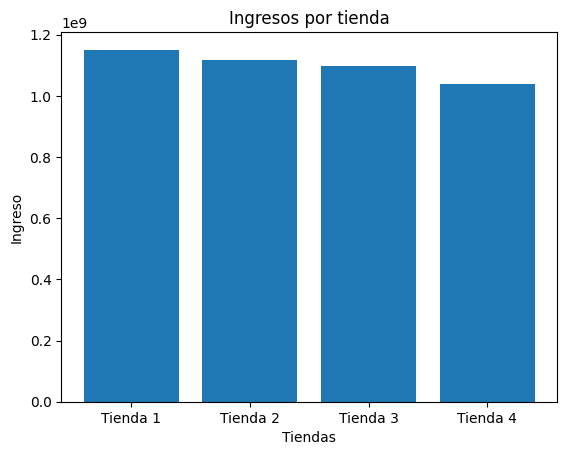

In [202]:
import matplotlib.pyplot as plt

suma=[suma_total,suma_total2,suma_total3,suma_total4]
lista=['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

plt.title('Ingresos por tienda')
plt.ylabel('Ingreso')
plt.xlabel('Tiendas')
plt.bar(lista, suma)
plt.show()

En cuanto a las categorías, el análisis general mostró que "Muebles" y "Electrónicos" tienen una alta demanda. No obstante, la composición de las ventas por categoría dentro de la Tienda 4 no se destaca particularmente en estas áreas de alta demanda general, lo que podría contribuir a sus menores ingresos totales.

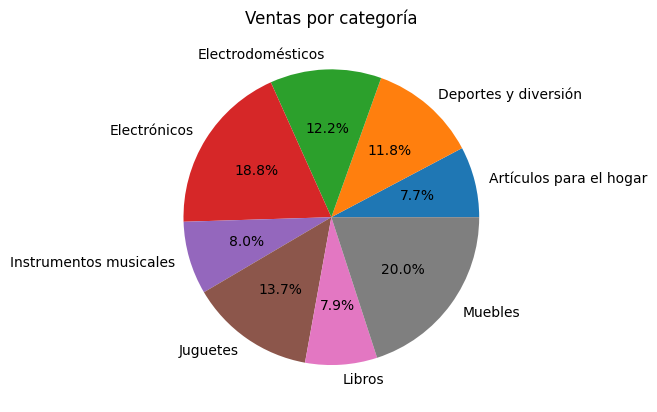

In [203]:
import matplotlib.pyplot as plt
plt.pie(ventas_totales_por_categoria['Cantidad de Ventas Totales'], labels=ventas_totales_por_categoria['Categoría del Producto'], autopct='%1.1f%%')
plt.title('Ventas por categoría')
plt.show()

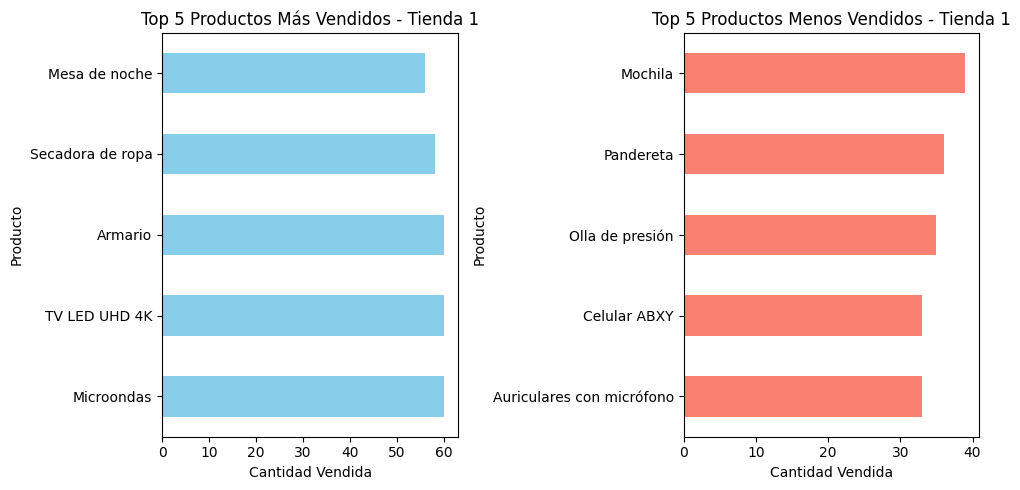

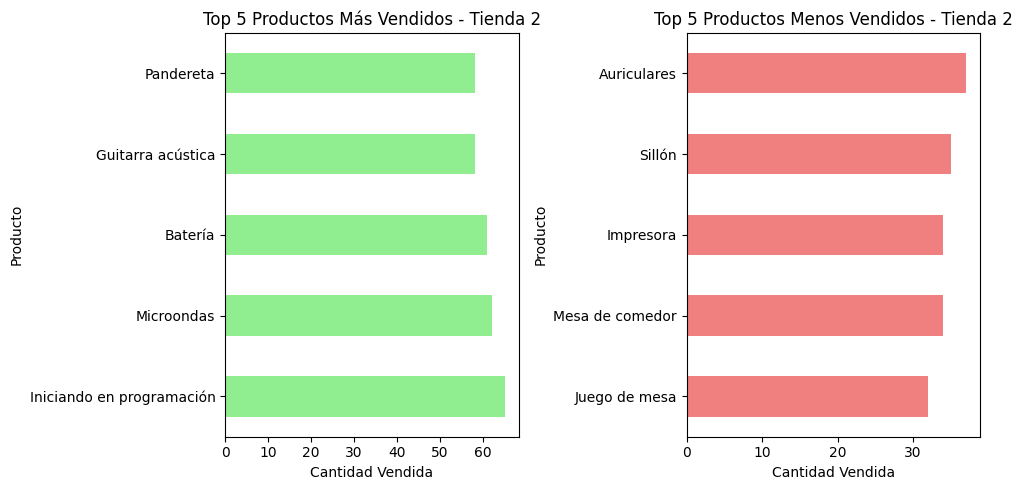

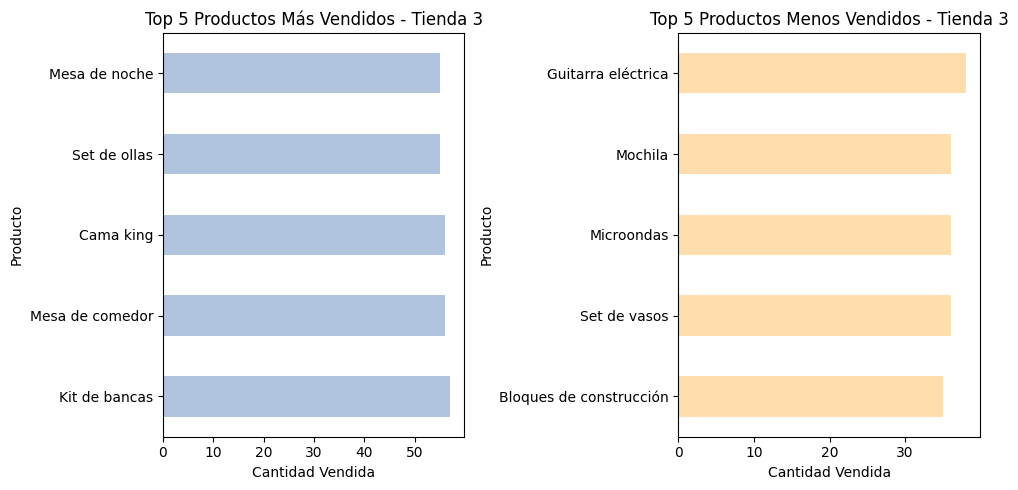

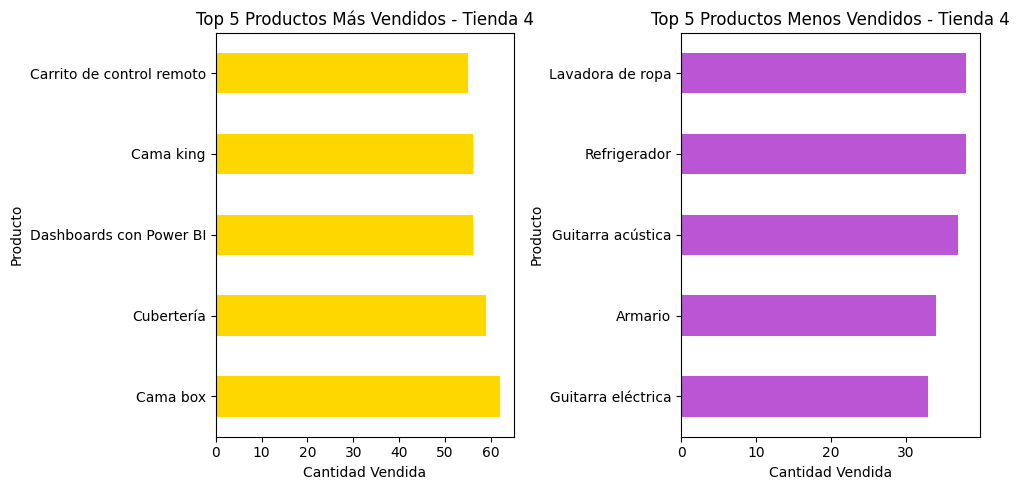

In [204]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
productos_max_tienda.plot(kind='barh', color='skyblue')
plt.title('Top 5 Productos Más Vendidos - Tienda 1')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.subplot(1, 2, 2)
productos_min_tienda.plot(kind='barh', color='salmon')
plt.title('Top 5 Productos Menos Vendidos - Tienda 1')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.tight_layout()
plt.show()

# Gráficos para la Tienda 2
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
productos_max_tienda2.plot(kind='barh', color='lightgreen')
plt.title('Top 5 Productos Más Vendidos - Tienda 2')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.subplot(1, 2, 2)
productos_min_tienda2.plot(kind='barh', color='lightcoral')
plt.title('Top 5 Productos Menos Vendidos - Tienda 2')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.tight_layout()
plt.show()

# Gráficos para la Tienda 3
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
productos_max_tienda3.plot(kind='barh', color='lightsteelblue')
plt.title('Top 5 Productos Más Vendidos - Tienda 3')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.subplot(1, 2, 2)
productos_min_tienda3.plot(kind='barh', color='navajowhite')
plt.title('Top 5 Productos Menos Vendidos - Tienda 3')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.tight_layout()
plt.show()

# Gráficos para la Tienda 4
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
productos_max_tienda4.plot(kind='barh', color='gold')
plt.title('Top 5 Productos Más Vendidos - Tienda 4')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.subplot(1, 2, 2)
productos_min_tienda4.plot(kind='barh', color='mediumorchid')
plt.title('Top 5 Productos Menos Vendidos - Tienda 4')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

plt.tight_layout()
plt.show()

Si bien la Tienda 4 presenta la ventaja de tener el costo de envío promedio más bajo, este factor no compensa su significativo rezago en generación de ingresos.


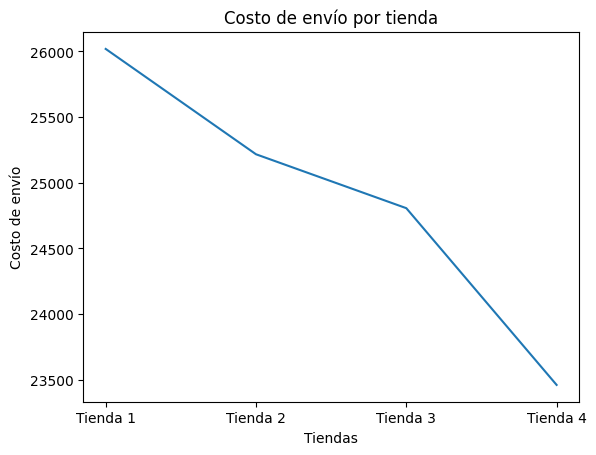

In [205]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(lista, costos_de_envio_promedio)
ax.set_xlabel('Tiendas')
ax.set_ylabel('Costo de envío')
ax.set_title('Costo de envío por tienda')
plt.show()

 En contraste, la Tienda 1 lidera en ingresos, y las Tiendas 2 y 3 también superan considerablemente el rendimiento financiero de la Tienda 4. La Tienda 1 destaca por tener la calificación promedio de clientes más baja, lo que sugiere una base de clientes no tan satisfecha, pero su volumen de ingresos aún es superior al de la Tienda 4.

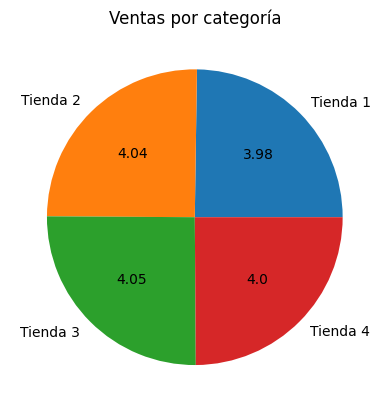

In [206]:
import matplotlib.pyplot as plt

def absolute_value(val):
    a = float(round(val/100.*sum(calificaciones_promedio),2))
    return a

plt.pie(calificaciones_promedio, labels=lista,autopct=absolute_value)
plt.title('Ventas por categoría')
plt.show()


Al vender la Tienda 4, el Sr. Juan puede optimizar sus operaciones, concentrando sus recursos y esfuerzos en las demas tiendas e iniciando un nuevo emprendimiento.

En conclusión, la Tienda 4 es la opción más adecuada para la venta, permitiendo al Sr. Juan enfocarse en sus negocios más exitosos.